In [1]:
from __future__ import print_function
import os
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.optim.lr_scheduler import StepLR

In [2]:
def cmd_args():
    # Training settings
    parser = argparse.ArgumentParser(description='PyTorch MNIST Example')
    parser.add_argument('--batch-size', type=int, default=64, metavar='N',
                        help='input batch size for training (default: 64)')
    parser.add_argument('--test-batch-size', type=int, default=1000, metavar='N',
                        help='input batch size for testing (default: 1000)')
    parser.add_argument('--epochs', type=int, default=14, metavar='N',
                        help='number of epochs to train (default: 14)')
    parser.add_argument('--lr', type=float, default=1.0, metavar='LR',
                        help='learning rate (default: 1.0)')
    parser.add_argument('--gamma', type=float, default=0.7, metavar='M',
                        help='Learning rate step gamma (default: 0.7)')
    parser.add_argument('--no-cuda', action='store_true', default=False,
                        help='disables CUDA training')
    parser.add_argument('--seed', type=int, default=1, metavar='S',
                        help='random seed (default: 1)')
    parser.add_argument('--log-interval', type=int, default=10, metavar='N',
                        help='how many batches to wait before logging training status')

    parser.add_argument('--save-model', action='store_true', default=False,
                        help='For Saving the current Model')
    args = parser.parse_args()

    return args


In [3]:
args = cmd_args()

usage: ipykernel_launcher.py [-h] [--batch-size N] [--test-batch-size N]
                             [--epochs N] [--lr LR] [--gamma M] [--no-cuda]
                             [--seed S] [--log-interval N] [--save-model]
ipykernel_launcher.py: error: unrecognized arguments: --ip=127.0.0.1 --stdin=9023 --control=9021 --hb=9020 --Session.signature_scheme="hmac-sha256" --Session.key=b"2cd36aae-0d0f-451d-adf6-a4bef4c3355d" --shell=9022 --transport="tcp" --iopub=9024 --f=/var/folders/5n/y3g3j3rs6n976js83857h3m00000gn/T/tmp-9940om4Uueyh5fch.json


SystemExit: 2

In [4]:
use_cuda = torch.cuda.is_available()
seed = 42
torch.manual_seed(seed)
device = torch.device("cuda" if use_cuda else "cpu")
batch_size = 32
kwargs = {'batch_size': batch_size}
if use_cuda:
    kwargs.update({'num_workers': 1,
                    'pin_memory': True,
                    'shuffle': True},
                    )

# prepare transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

# load mnist data
datasets_path = os.path.expanduser("~/.datasets")
mnist_train = datasets.MNIST(
    datasets_path, train=True, download=True, transform=transform)
mnist_test = datasets.MNIST(
    datasets_path, train=False, transform=transform)
train_loader = torch.utils.data.DataLoader(mnist_train, **kwargs)
test_loader = torch.utils.data.DataLoader(mnist_test, **kwargs)

# choose model: resnet18
resnet18 = models.resnet18(pretrained=True)

In [5]:
resnet18

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [6]:
resnet18.fc

Linear(in_features=512, out_features=1000, bias=True)

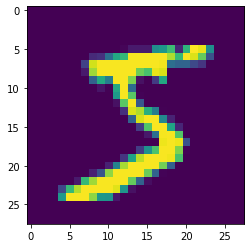

In [29]:
import matplotlib.pyplot as plt
img, label = mnist_train[0]
_img = img.reshape(28, 28)
plt.imshow(_img)

In [35]:
img, label = mnist_train[0]
print(type(img))
print(img.size())
print(label)

<class 'torch.Tensor'>
torch.Size([1, 28, 28])
5


In [34]:
resnet18(img)

RuntimeError: Expected 4-dimensional input for 4-dimensional weight 64 3 7 7, but got 3-dimensional input of size [1, 28, 28] instead